In [3]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [5]:
data=pd.read_csv("bank-full.csv",sep=';')

In [8]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


<AxesSubplot:>

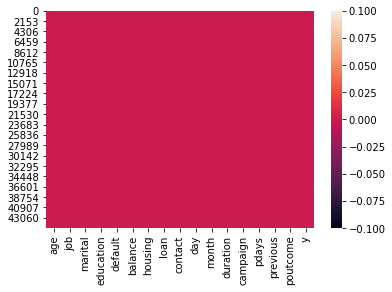

In [16]:
sns.heatmap(data.isnull())

In [17]:
data['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [18]:
data['education'].unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

<AxesSubplot:xlabel='education', ylabel='count'>

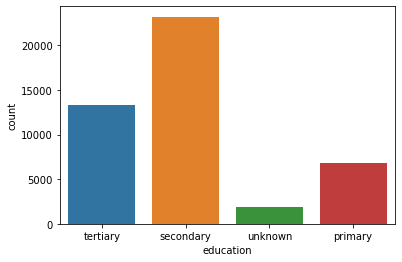

In [20]:
sns.countplot(x='education',data=data)

In [21]:
stats.mode(data['education'])

ModeResult(mode=array(['secondary'], dtype=object), count=array([23202]))

In [6]:
data.drop(["job"],inplace=True,axis = 1)
data.drop(["contact"],inplace=True,axis = 1)
data.drop(["day"],inplace=True,axis = 1)
data.drop(["month"],inplace=True,axis = 1)
data.drop(["poutcome"],inplace=True,axis = 1)

In [24]:
data

,age,marital,education,default,balance,housing,loan,duration,campaign,pdays,previous,y
0,58,married,tertiary,no,2143,yes,no,261,1,-1,0,no
1,44,single,secondary,no,29,yes,no,151,1,-1,0,no
2,33,married,secondary,no,2,yes,yes,76,1,-1,0,no
3,47,married,unknown,no,1506,yes,no,92,1,-1,0,no
4,33,single,unknown,no,1,no,no,198,1,-1,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,married,tertiary,no,825,no,no,977,3,-1,0,yes
45207,71,divorced,primary,no,1729,no,no,456,2,-1,0,yes
45208,72,married,secondary,no,5715,no,no,1127,5,184,3,yes
45209,57,married,secondary,no,668,no,no,508,4,-1,0,no


In [13]:
marital =['marital']
data = pd.get_dummies(data,columns=marital,drop_first=True)

In [12]:
education = ['education']
data = pd.get_dummies(data,columns=education,drop_first=True)

In [11]:
default = ['default']
data = pd.get_dummies(data,columns=default,drop_first=True)

In [10]:
housing=['housing']
data=pd.get_dummies(data,columns=housing,drop_first=True)

In [9]:
loan = ['loan']
data = pd.get_dummies(data,columns=loan,drop_first=True)

In [8]:
y = ['y']
data = pd.get_dummies(data,columns=y,drop_first=True)

In [7]:
data

,age,marital,education,default,balance,housing,loan,duration,campaign,pdays,previous,y
0,58,married,tertiary,no,2143,yes,no,261,1,-1,0,no
1,44,single,secondary,no,29,yes,no,151,1,-1,0,no
2,33,married,secondary,no,2,yes,yes,76,1,-1,0,no
3,47,married,unknown,no,1506,yes,no,92,1,-1,0,no
4,33,single,unknown,no,1,no,no,198,1,-1,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,married,tertiary,no,825,no,no,977,3,-1,0,yes
45207,71,divorced,primary,no,1729,no,no,456,2,-1,0,yes
45208,72,married,secondary,no,5715,no,no,1127,5,184,3,yes
45209,57,married,secondary,no,668,no,no,508,4,-1,0,no


In [25]:
data.columns
X = data[['age', 'balance', 'duration', 'campaign', 'pdays', 'previous',
       'marital_married', 'marital_single', 'education_secondary',
       'education_tertiary', 'education_unknown', 'default_yes', 'housing_yes',
       'loan_yes']]
y = data['y_yes']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [17]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\Prasad\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [27]:
predictions = logmodel.predict(X_test)

In [38]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     13175
           1       0.57      0.20      0.30      1745

    accuracy                           0.89     14920
   macro avg       0.74      0.59      0.62     14920
weighted avg       0.86      0.89      0.86     14920



In [26]:
classifier = LogisticRegression()
classifier.fit(X,y)

C:\Users\Prasad\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [29]:
y_pred = classifier.predict(X)

In [34]:
y_pred_df= pd.DataFrame({'actual': y,
                         'predicted_prob': classifier.predict(X)})

In [35]:
y_pred_df

,actual,predicted_prob
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,1,1
45207,1,0
45208,1,0
45209,0,0


In [37]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y,y_pred)
print (confusion_matrix)

[[39174   748]
 [ 4273  1016]]


In [20]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

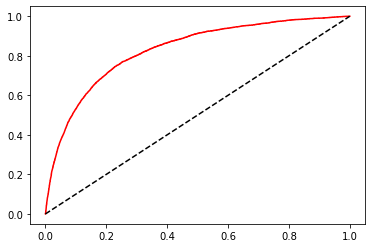

In [32]:
fpr, tpr, thresholds = roc_curve(y, classifier.predict_proba (X)[:,1])
auc = roc_auc_score(y, y_pred)
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')

In [39]:
auc

0.586680134221649